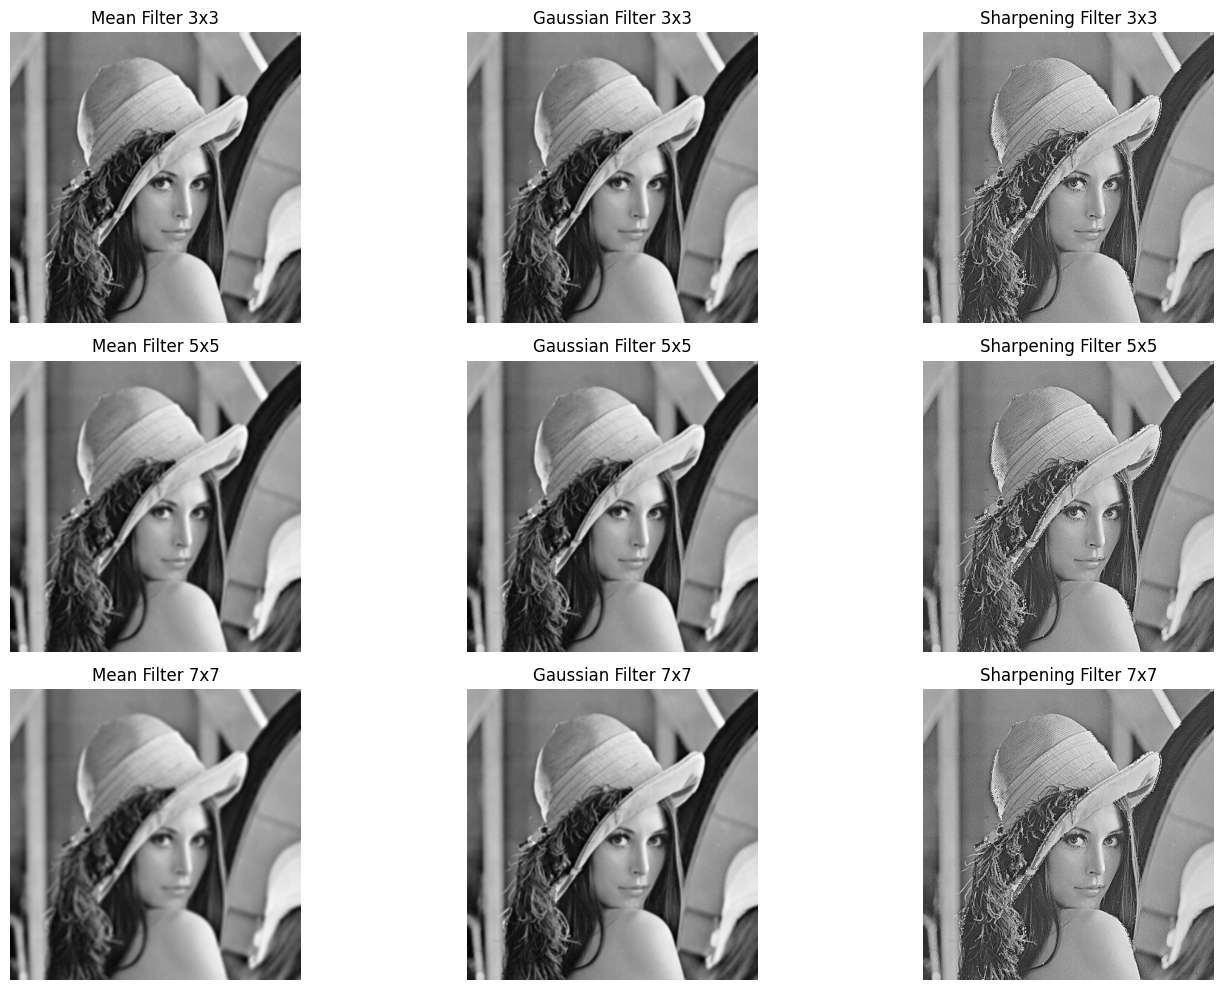

In [45]:
#P1. Implement the convolution operator. Directly calling a convolution or filtering function from any library is prohibited. You can use the linear filtering code in our code tutorial as a template (available in Blackboard) or build your code from scratch. You are encouraged to implement your Gaussian function. Please use padding to keep the image size unchanged. (25 points)
#Use convolution to apply mean, Gaussian (std=1), and sharping filters to lena.png.
#Try different kernel sizes: 3x3, 5x5, and 7x7.


import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image = cv2.imread('/Users/abhishekbasu/Documents/CS 415 COMPUTER VISION/ASSIGNMENT 1/lena.png', cv2.IMREAD_GRAYSCALE)

def create_mean_kernel(size):
    return np.ones((size, size), np.float32) / (size * size)

def create_gaussian_kernel(size, sigma):
    kernel = np.fromfunction(
        lambda x, y: (1 / (2 * np.pi * sigma ** 2)) * 
                     np.exp(-(((x - (size - 1) / 2) ** 2 + (y - (size - 1) / 2) ** 2) / (2 * sigma ** 2))),
        (size, size)
    )
    return kernel / np.sum(kernel)

def create_sharpening_kernel():
    return np.array([[0, -1, 0],
                     [-1, 5, -1],
                     [0, -1, 0]])

def convolve2d(image, kernel):
    kernel_height, kernel_width = kernel.shape
    pad_height = kernel_height // 2
    pad_width = kernel_width // 2

    # Pad the image to handle borders
    padded_image = np.pad(image, ((pad_height, pad_height), (pad_width, pad_width)), mode='edge')
    output = np.zeros_like(image)

    # Perform convolution
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            patch = padded_image[i:i + kernel_height, j:j + kernel_width]
            output[i, j] = np.sum(patch * kernel)

    return output

# Define kernel sizes
kernel_sizes = [3, 5, 7]
filtered_images = []

# Apply filters for different kernel sizes
for size in kernel_sizes:
    mean_kernel = create_mean_kernel(size)
    gaussian_kernel = create_gaussian_kernel(size, sigma=1)
    sharpening_kernel = create_sharpening_kernel()

    mean_filtered_image = convolve2d(image, mean_kernel)
    gaussian_filtered_image = convolve2d(image, gaussian_kernel)
    sharpening_filtered_image = convolve2d(image, sharpening_kernel)

    filtered_images.append((mean_filtered_image, gaussian_filtered_image, sharpening_filtered_image))

# Display results
plt.figure(figsize=(15, 10))

for i, (mean_image, gaussian_image, sharpen_image) in enumerate(filtered_images):
    plt.subplot(len(kernel_sizes), 3, 3 * i + 1)
    plt.imshow(mean_image, cmap='gray')
    plt.title(f'Mean Filter {kernel_sizes[i]}x{kernel_sizes[i]}')
    plt.axis('off')

    plt.subplot(len(kernel_sizes), 3, 3 * i + 2)
    plt.imshow(gaussian_image, cmap='gray')
    plt.title(f'Gaussian Filter {kernel_sizes[i]}x{kernel_sizes[i]}')
    plt.axis('off')

    plt.subplot(len(kernel_sizes), 3, 3 * i + 3)
    plt.imshow(sharpen_image, cmap='gray')
    plt.title(f'Sharpening Filter {kernel_sizes[i]}x{kernel_sizes[i]}')
    plt.axis('off')

plt.tight_layout()
plt.show()


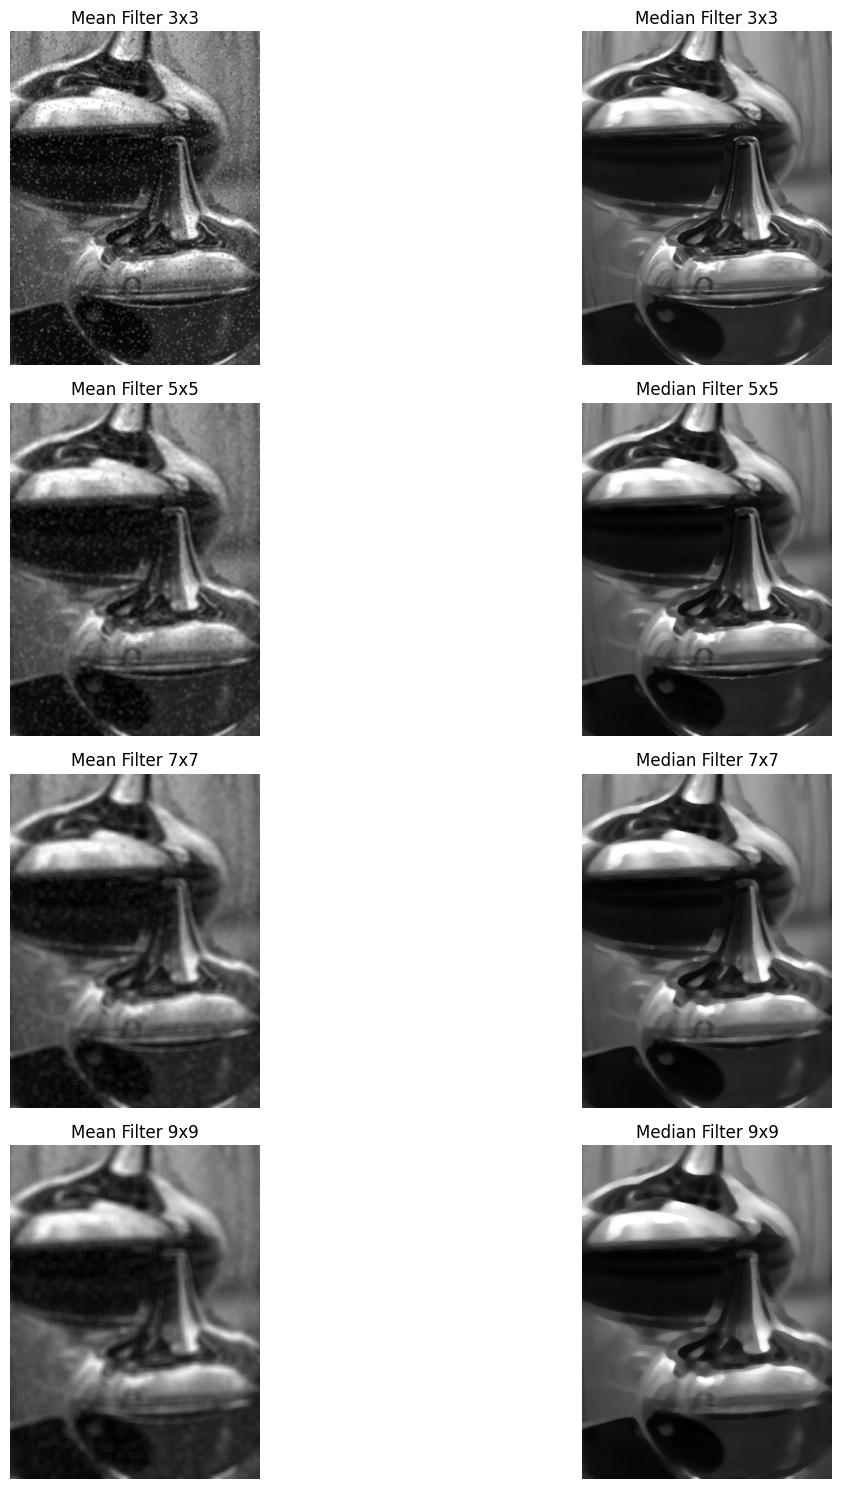

In [44]:
#P2. Implement the median filter (same requirement as P1). To keep the image size unchanged, you may simply ignore the pixels outside the input image when calculating the median value of a patch. (25 points)
#	Apply both mean and median filters to art.png.
#	Try different kernel sizes: 3x3, 5x5, 7x7, and 9x9.


import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image = cv2.imread('/Users/abhishekbasu/Documents/CS 415 COMPUTER VISION/ASSIGNMENT 1/art.png', cv2.IMREAD_GRAYSCALE)

def mean_filter(image, kernel_size):
    padded_image = np.pad(image, pad_width=kernel_size//2, mode='edge')
    filtered_image = np.zeros_like(image)

    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            patch = padded_image[i:i + kernel_size, j:j + kernel_size]
            filtered_image[i, j] = np.mean(patch)

    return filtered_image

def median_filter(image, kernel_size):
    padded_image = np.pad(image, pad_width=kernel_size//2, mode='edge')
    filtered_image = np.zeros_like(image)

    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            patch = padded_image[i:i + kernel_size, j:j + kernel_size]
            filtered_image[i, j] = np.median(patch)

    return filtered_image

# Define kernel sizes
kernel_sizes = [3, 5, 7, 9]

# Prepare to display results
plt.figure(figsize=(15, 15))

# Apply filters and display results
for i, size in enumerate(kernel_sizes):
    # Apply mean filter
    mean_filtered_image = mean_filter(image, size)
    plt.subplot(len(kernel_sizes), 2, 2 * i + 1)
    plt.imshow(mean_filtered_image, cmap='gray')
    plt.title(f'Mean Filter {size}x{size}')
    plt.axis('off')
    
    # Apply median filter
    median_filtered_image = median_filter(image, size)
    plt.subplot(len(kernel_sizes), 2, 2 * i + 2)
    plt.imshow(median_filtered_image, cmap='gray')
    plt.title(f'Median Filter {size}x{size}')
    plt.axis('off')

plt.tight_layout()
plt.show()


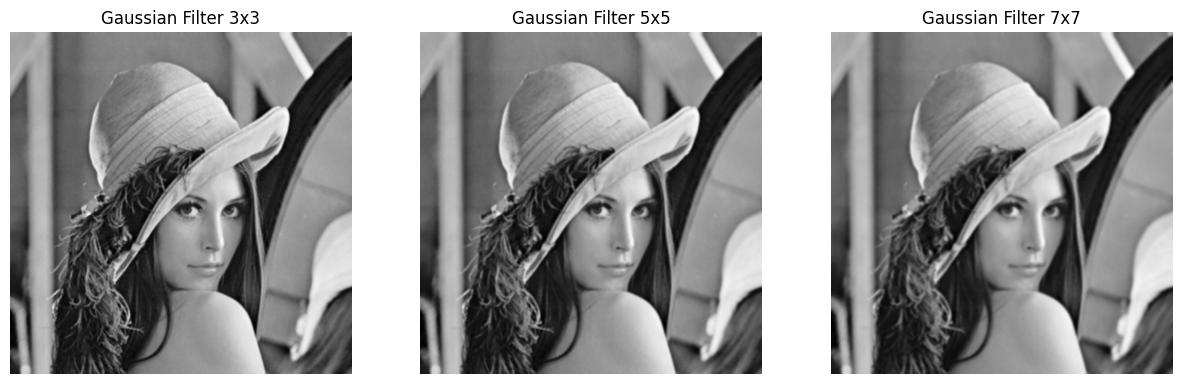

In [23]:
#P3. Self-study the filter2D function in OpenCV1. Use it to perform Gaussian filtering on lena.png with different kernel sizes (3x3, 5x5, and 7x7).
#  Are the results the same as those obtained by your implementation in P1? (10 points)

import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image = cv2.imread('/Users/abhishekbasu/Documents/CS 415 COMPUTER VISION/ASSIGNMENT 1/lena.png', cv2.IMREAD_GRAYSCALE)

# Define a function to apply Gaussian filter using filter2D
def apply_gaussian_filter(image, kernel_size):
    # Create Gaussian kernel
    gaussian_kernel = cv2.getGaussianKernel(kernel_size, sigma=-1)
    gaussian_kernel = gaussian_kernel * gaussian_kernel.T  # Create 2D kernel
    return cv2.filter2D(image, -1, gaussian_kernel)

# Kernel sizes
kernel_sizes = [3, 5, 7]
filtered_images = []

# Apply Gaussian filtering for different kernel sizes
for size in kernel_sizes:
    filtered_image = apply_gaussian_filter(image, size)
    filtered_images.append(filtered_image)

# Display results
plt.figure(figsize=(15, 5))
for i, size in enumerate(kernel_sizes):
    plt.subplot(1, len(kernel_sizes), i + 1)
    plt.imshow(filtered_images[i], cmap='gray')
    plt.title(f'Gaussian Filter {size}x{size}')
    plt.axis('off')
plt.show()


In [46]:
import os
print(os.getcwd())  


/Users/abhishekbasu/Documents/CS 415 COMPUTER VISION/ASSIGNMENT 1
